In [62]:
# All the Necessary Libraries For Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "data.csv" with length 22511 bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
data = pd.read_csv('data.csv')

data

In [ ]:
data.head()

In [39]:
data.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


In [40]:
columns = data.columns.tolist()
columns

['footfall',
 'tempMode',
 'AQ',
 'USS',
 'CS',
 'VOC',
 'RP',
 'IP',
 'Temperature',
 'fail']

In [41]:
for col in columns:

    print(col)
    print(data[col].unique())
    print()

footfall
[   0  190   31   83  640  110  100  180 2800 1600  330 1000  130    5
   33   19   74   12  390   40    3  450  350   64   62   11    4   35
  270   45    6    2 3500   67   30  400   15   22   32   59  170    1
   53   16   27   84  200   20 7300   13    9   44   51   29  630   50
  720   24   55   63   71  900  370  470   47    8  290   10   93  510
   56    7  140   14  310   37   23  360   87   42   70  520   54   75
   34   76  430  150   25   18  740   81  160  220   26   88   66  570
   17]

tempMode
[7 1 4 3 0 5 2 6]

AQ
[7 3 2 5 4 6 1]

USS
[1 3 2 4 6 7 5]

CS
[6 5 4 3 7 2 1]

VOC
[6 1 0 4 3 5 2]

RP
[36 20 24 28 68 21 77 31 39 26 22 42 74 62 58 51 88 27 44 45 40 48 34 60
 32 33 57 84 75 19 47 35 43 76 46 38 69 67 72 37 30 64 59 55 65 73 91 71
 83 53 82 49 56 25 85 70 78 80 79 66 87 52 29 41 23 50 61 63 54 89 81]

IP
[3 4 6 2 5 1 7]

Temperature
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]

fail
[1 0]



In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [43]:
data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


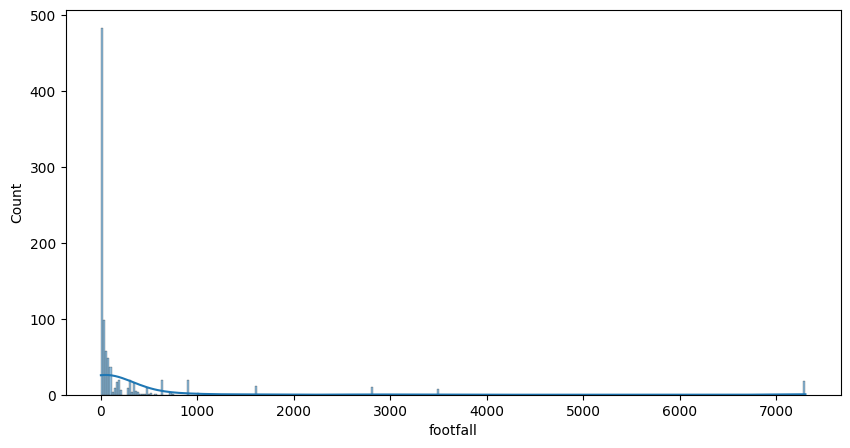

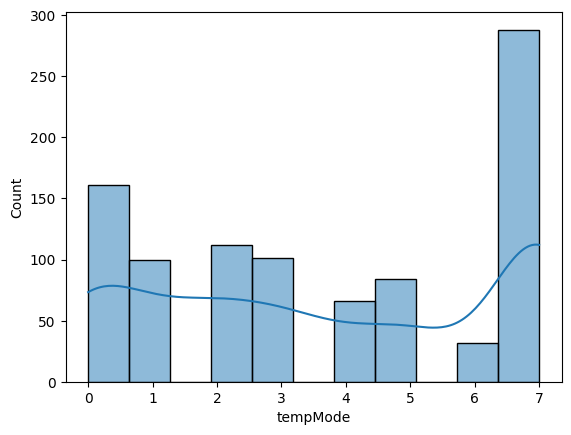

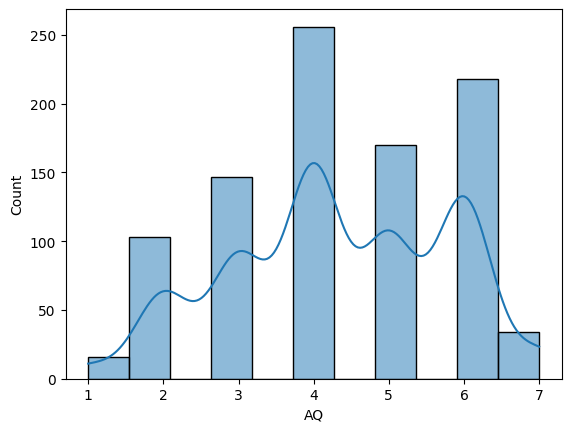

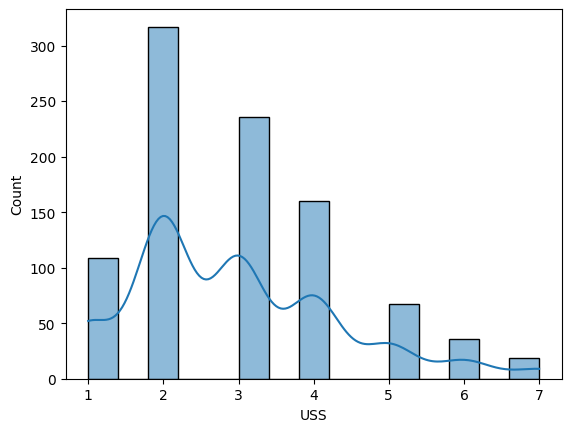

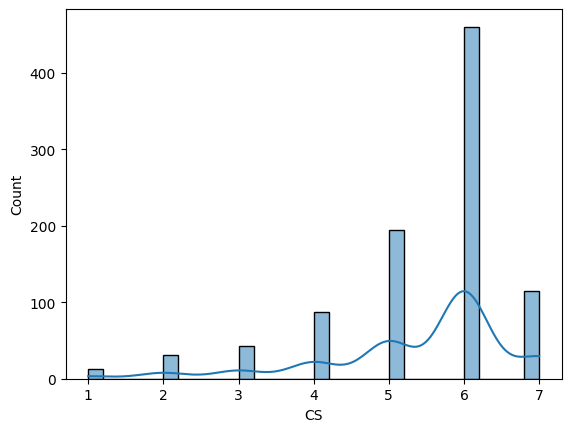

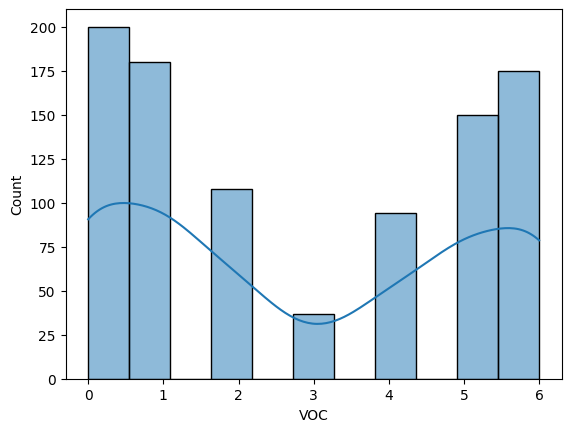

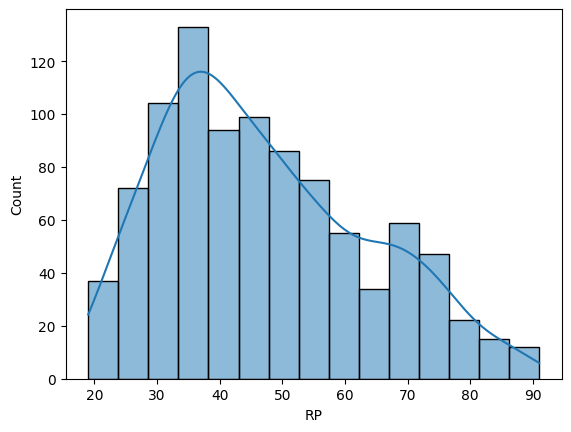

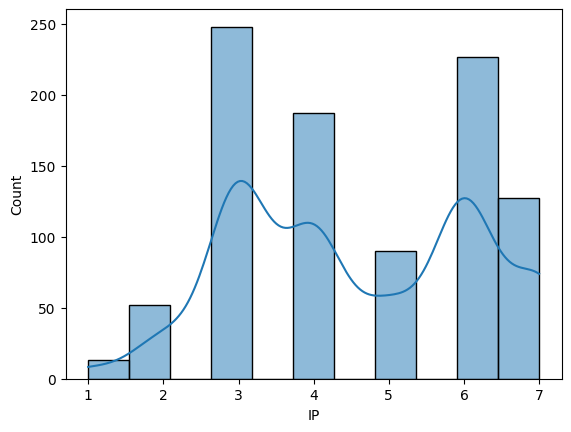

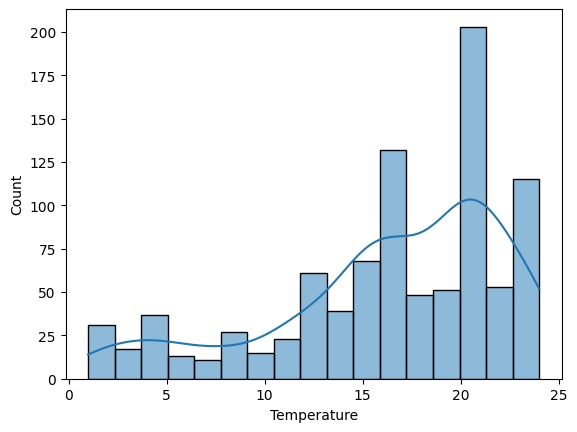

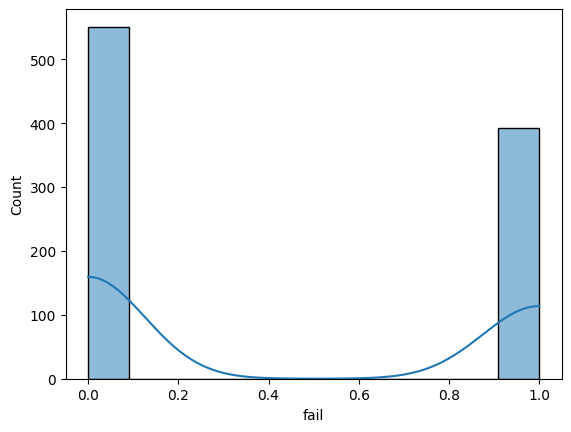

In [44]:
plt.figure(figsize=(10, 5))
for col in columns:
    sns.histplot(data[col], kde=True)  # kde=True adds a KDE line to the histogram
    plt.show()

In [45]:
# Distribution of numeric columns
fig = make_subplots(rows=5, cols=2, subplot_titles=data.columns)
for i, column in enumerate(data.columns):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = px.histogram(data, x=column, template='plotly_dark', color_discrete_sequence=['#F63366'])
    hist.update_traces(marker_line_width=0.5, marker_line_color="white")
    fig.add_trace(hist.data[0], row=row, col=col)

fig.update_layout(height=1200, title_text="Distribution of Numeric Columns", title_font=dict(size=25), title_x=0.5, showlegend=False)
fig.show()


In [46]:
# Correlation Heatmap
corr = data.corr()
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
    colorscale='Viridis')
fig.update_layout(title_text='Correlation Heatmap', title_font=dict(size=25), title_x=0.5)
fig.show()

In [48]:
# Boxplots for each feature to identify outliers
fig = make_subplots(rows=5, cols=2, subplot_titles=data.columns[:-1])
for i, column in enumerate(data.columns[:-1]):  # Excluding the target column 'fail'
    row = i // 2 + 1
    col = i % 2 + 1
    box = px.box(data, y=column, template='plotly_dark', color_discrete_sequence=['#636EFA'])
    box.update_traces(marker_line_width=0.5, marker_line_color="white")
    fig.add_trace(box.data[0], row=row, col=col)

fig.update_layout(height=1200, title_text="Boxplots of Features", title_font=dict(size=25), title_x=0.5, showlegend=False)
fig.show()

In [49]:
data[data['footfall'] == 7300]

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
115,7300,5,7,7,6,3,21,2,8,0
125,7300,5,3,4,3,3,36,4,8,0
130,7300,1,2,2,7,3,27,6,9,0
161,7300,3,5,3,6,1,19,4,11,0
249,7300,3,2,2,6,0,37,4,14,0
288,7300,7,4,2,4,4,63,6,15,1
399,7300,2,3,3,4,0,62,4,16,0
423,7300,0,4,2,6,3,79,4,17,0
462,7300,1,6,3,6,6,32,3,17,1
515,7300,7,4,4,7,0,44,5,18,0


In [50]:
data[data['Temperature'] == 1]

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0
9,2800,0,3,3,7,0,39,3,1,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import joblib

In [52]:
# Splitting the Data into X and y
X = data.drop(columns=['fail'])
y = data['fail']

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Model Training and Hyperparameter Tuning
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

params = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [56]:
%%time
best_models = {}
best_accuracy = 0
best_model_name = ''
best_model = None

for model_name in models.keys():
    grid = GridSearchCV(models[model_name], params[model_name], cv=5, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    y_pred = grid.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = grid.best_estimator_

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 200}
Accuracy for RandomForest: 0.8783068783068783
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM: {'C': 0.01, 'kernel': 'linear'}
Accuracy for SVM: 0.8783068783068783

Best model: RandomForest with accuracy: 0.8783068783068783
CPU times: user 771 ms, sys: 87.4 ms, total: 858 ms
Wall time: 17.8 s


In [57]:
# Evaluation of the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

In [58]:
# Plot confusion matrix
fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues', template='plotly_dark')
fig.update_layout(title_text=f'Confusion Matrix for {best_model_name}', title_font=dict(size=25), title_x=0.5)
fig.show()

In [60]:
# Print classification report
report_data = pd.DataFrame(report).transpose()
print(f'Classification Report for {best_model_name}')
print(report_data)


Classification Report for RandomForest
              precision    recall  f1-score     support
0              0.891089  0.882353  0.886700  102.000000
1              0.863636  0.873563  0.868571   87.000000
accuracy       0.878307  0.878307  0.878307    0.878307
macro avg      0.877363  0.877958  0.877635  189.000000
weighted avg   0.878452  0.878307  0.878355  189.000000


In [61]:
# ROC Curve and AUC for the best model
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{best_model_name} (AUC = {roc_auc:.2f})', line=dict(width=2)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash', color='gray'), name='Random'))
fig.update_layout(title_text='Receiver Operating Characteristic', title_font=dict(size=25), xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_dark')
fig.show()